In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [23]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=256, CH = CH)

In [25]:
ls /home/bijanadmin/Desktop/Goose_data/

data_Goose_1st_15s_1/  data_Goose_1st_5s_2/   figures/
data_Goose_1st_15s_2/  data_Goose_all_15s_2/  figuresfig.png
data_Goose_1st_2/      data_Goose_all_2/      model/
data_Goose_1st_5s_1/   data_Goose_all_5s_2/


In [26]:
len(train_loader), len(val_loader), len(test_loader)

(50, 16, 16)

In [27]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([256, 1, 100, 15])
torch.Size([256, 1])
256
256
256


date:180323, rec:007, time:4308.0, label:0.0


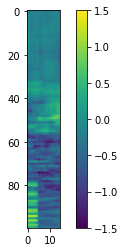

date:180322, rec:004, time:5804.0, label:1.0
date:180325, rec:007, time:1715.0, label:1.0
date:180325, rec:007, time:4775.0, label:0.0


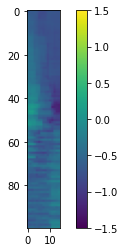

date:180324, rec:005, time:3146.0, label:1.0
date:180325, rec:007, time:2578.0, label:0.0


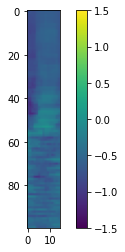

date:180325, rec:009, time:6186.0, label:1.0
date:180324, rec:008, time:5070.0, label:0.0


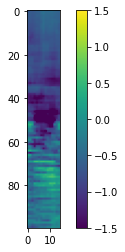

date:180324, rec:003, time:3947.0, label:1.0
date:180401, rec:001, time:5765.0, label:1.0
date:180322, rec:007, time:2255.0, label:0.0


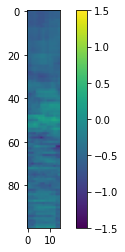

date:180325, rec:003, time:4595.0, label:0.0


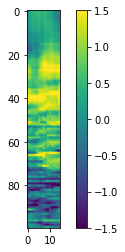

date:180325, rec:001, time:1632.0, label:0.0


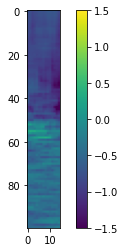

date:180325, rec:007, time:4910.0, label:0.0


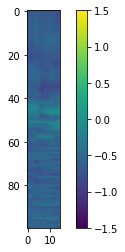

date:180325, rec:001, time:792.0, label:0.0


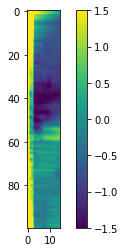

date:180325, rec:007, time:5090.0, label:0.0


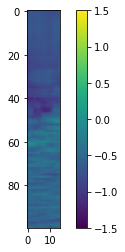

date:180322, rec:007, time:1559.0, label:0.0


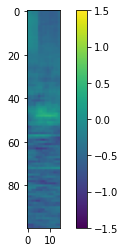

date:180323, rec:003, time:4007.0, label:1.0
date:180325, rec:005, time:3811.0, label:1.0
date:180325, rec:001, time:2818.0, label:1.0
date:180401, rec:001, time:387.0, label:0.0


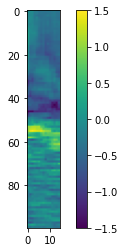

date:180325, rec:009, time:6467.0, label:0.0


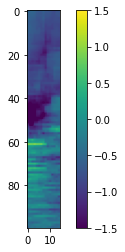

date:180324, rec:008, time:3565.0, label:0.0


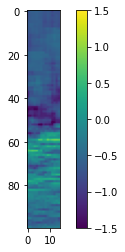

date:180401, rec:001, time:4714.0, label:1.0
date:180323, rec:002, time:2888.0, label:1.0
date:180325, rec:001, time:1617.0, label:0.0


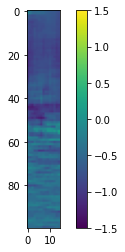

date:180325, rec:006, time:4887.0, label:1.0
date:180323, rec:003, time:5118.0, label:1.0
date:180323, rec:004, time:5581.0, label:1.0
date:180325, rec:003, time:6664.0, label:1.0
date:180325, rec:002, time:4205.0, label:1.0
date:180325, rec:004, time:2842.0, label:1.0
date:180322, rec:005, time:2933.0, label:1.0
date:180322, rec:007, time:4607.0, label:0.0


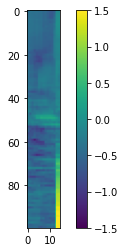

date:180325, rec:007, time:5135.0, label:0.0


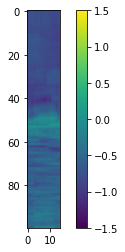

date:180323, rec:002, time:3594.0, label:1.0
date:180325, rec:005, time:5274.0, label:1.0
date:180325, rec:009, time:4571.0, label:0.0


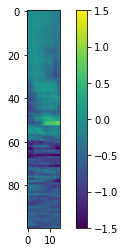

date:180325, rec:001, time:717.0, label:0.0


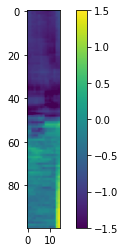

date:180324, rec:001, time:3677.0, label:1.0
date:180325, rec:007, time:4925.0, label:0.0


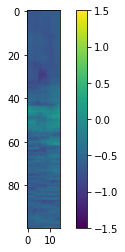

date:180325, rec:005, time:4635.0, label:1.0
date:180325, rec:009, time:5096.0, label:0.0


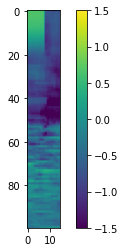

date:180323, rec:007, time:2201.0, label:0.0


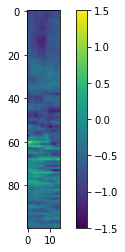

date:180322, rec:007, time:4982.0, label:0.0


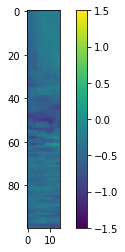

date:180325, rec:007, time:4730.0, label:0.0


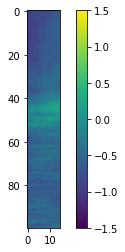

date:180325, rec:002, time:5120.0, label:1.0
date:180324, rec:009, time:387.0, label:0.0


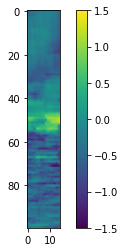

date:180324, rec:008, time:1993.0, label:0.0


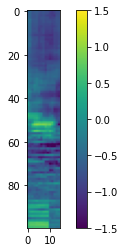

date:180325, rec:009, time:2292.0, label:0.0


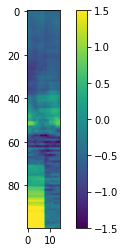

date:180325, rec:003, time:2732.0, label:1.0
date:180324, rec:001, time:1143.0, label:1.0
date:180323, rec:007, time:2837.0, label:0.0


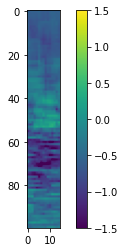

date:180325, rec:005, time:4173.0, label:0.0


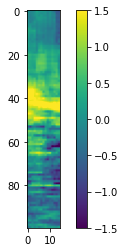

date:180325, rec:006, time:1420.0, label:1.0
date:180323, rec:007, time:2852.0, label:0.0


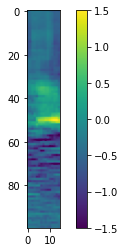

date:180325, rec:004, time:177.0, label:1.0
date:180401, rec:001, time:5299.0, label:0.0


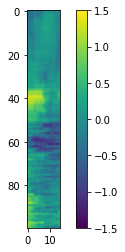

date:180325, rec:001, time:4563.0, label:1.0
date:180322, rec:007, time:4022.0, label:0.0


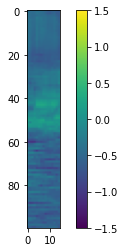

date:180322, rec:007, time:4082.0, label:0.0


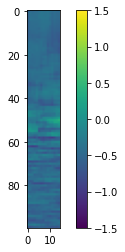

date:180325, rec:006, time:4977.0, label:1.0
date:180401, rec:001, time:102.0, label:0.0


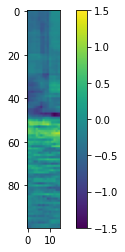

date:180322, rec:005, time:3068.0, label:1.0
date:180401, rec:002, time:2908.0, label:1.0
date:180324, rec:008, time:2590.0, label:0.0


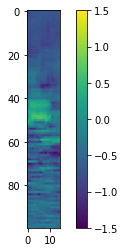

date:180324, rec:008, time:2053.0, label:0.0


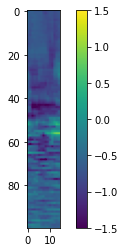

date:180325, rec:004, time:6394.0, label:1.0
date:180401, rec:002, time:3133.0, label:1.0
date:180323, rec:004, time:5311.0, label:1.0
date:180324, rec:006, time:5945.0, label:1.0
date:180401, rec:001, time:522.0, label:0.0


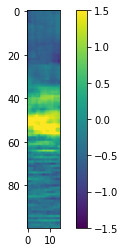

date:180322, rec:001, time:42.0, label:0.0


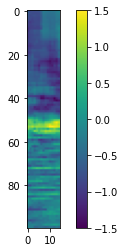

date:180324, rec:009, time:462.0, label:0.0


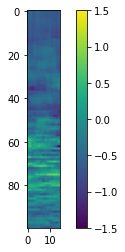

date:180324, rec:004, time:5256.0, label:1.0
date:180324, rec:009, time:1240.0, label:0.0


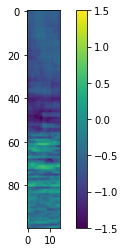

date:180325, rec:005, time:4785.0, label:1.0
date:180322, rec:003, time:890.0, label:1.0
date:180325, rec:007, time:117.0, label:1.0
date:180322, rec:004, time:4026.0, label:1.0
date:180324, rec:001, time:865.0, label:0.0


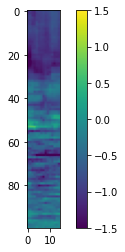

date:180401, rec:001, time:5209.0, label:0.0


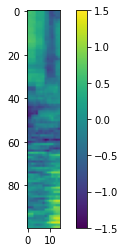

date:180325, rec:004, time:2520.0, label:1.0
date:180324, rec:006, time:5780.0, label:1.0
date:180325, rec:005, time:6050.0, label:1.0
date:180325, rec:001, time:4608.0, label:1.0
date:180325, rec:004, time:3022.0, label:1.0
date:180325, rec:004, time:3397.0, label:1.0
date:180322, rec:007, time:121.0, label:1.0
date:180325, rec:002, time:2847.0, label:1.0
date:180401, rec:001, time:102.0, label:0.0


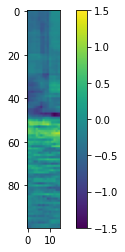

date:180323, rec:002, time:5452.0, label:1.0
date:180323, rec:007, time:4308.0, label:0.0


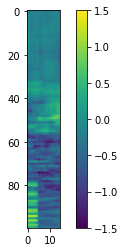

date:180322, rec:007, time:3506.0, label:0.0


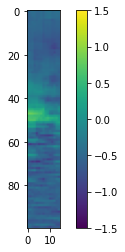

date:180324, rec:008, time:2770.0, label:0.0


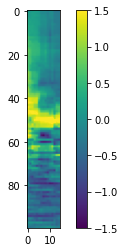

date:180325, rec:009, time:4466.0, label:0.0


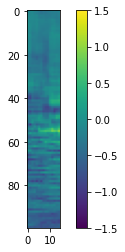

date:180325, rec:009, time:4811.0, label:0.0


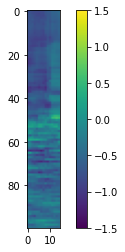

date:180322, rec:003, time:3220.0, label:1.0
date:180401, rec:001, time:3455.0, label:1.0
date:180324, rec:006, time:4091.0, label:1.0
date:180325, rec:004, time:1815.0, label:1.0
date:180325, rec:005, time:3375.0, label:1.0
date:180401, rec:001, time:102.0, label:0.0


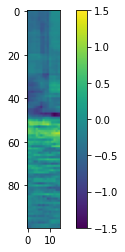

date:180324, rec:004, time:6704.0, label:1.0
date:180323, rec:002, time:4808.0, label:1.0
date:180322, rec:002, time:4161.0, label:1.0
date:180322, rec:007, time:1454.0, label:0.0


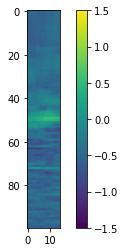

date:180325, rec:009, time:1902.0, label:0.0


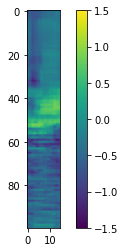

date:180325, rec:009, time:4961.0, label:0.0


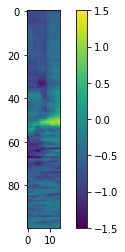

date:180324, rec:008, time:2830.0, label:0.0


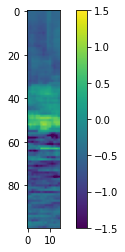

date:180325, rec:001, time:3417.0, label:1.0
date:180323, rec:003, time:959.0, label:1.0
date:180325, rec:005, time:4173.0, label:0.0


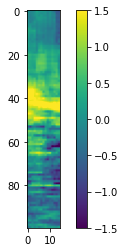

date:180323, rec:007, time:1991.0, label:0.0


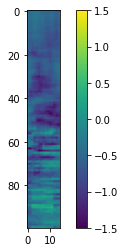

date:180325, rec:004, time:4841.0, label:1.0
date:180324, rec:009, time:837.0, label:0.0


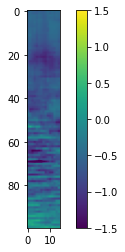

date:180401, rec:001, time:1722.0, label:0.0


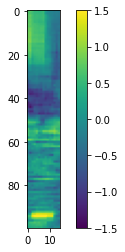

date:180325, rec:001, time:1152.0, label:0.0


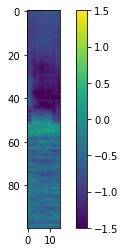

date:180325, rec:009, time:27.0, label:0.0


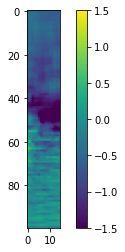

date:180325, rec:009, time:2202.0, label:0.0


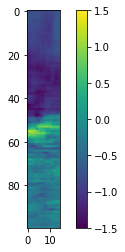

date:180324, rec:001, time:6694.0, label:1.0
date:180325, rec:005, time:4188.0, label:0.0


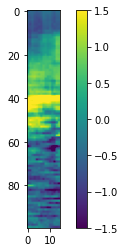

date:180325, rec:004, time:5744.0, label:1.0
date:180323, rec:007, time:7088.0, label:0.0


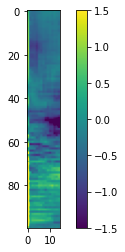

date:180324, rec:008, time:6931.0, label:0.0


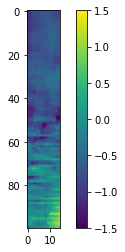

date:180325, rec:005, time:4173.0, label:0.0


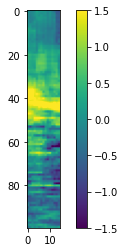

date:180325, rec:009, time:1797.0, label:0.0


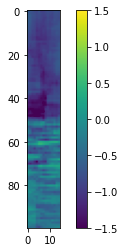

date:180325, rec:007, time:5795.0, label:0.0


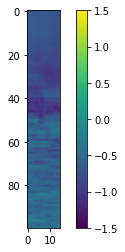

In [28]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}, label:{}'.format(date[i], rec[i], time[i], label[i][0].numpy()))
        if label[i][0].numpy() == 0.0:
            data_sub = data[i][0]
            plt.imshow(data_sub)
            plt.clim(-1.5, 1.5)
            plt.colorbar()
            plt.show()
    break

### Logistic regression with no regularization

In [29]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'
CH = 23
timewindow = 15



Train loss for epoch 0: 0.5358182191848755
Val loss for epoch 0: 0.5384373664855957
Train loss for epoch 1: 0.5019468665122986
Val loss for epoch 1: 0.509207546710968
1
Train loss for epoch 2: 0.49031686782836914
Val loss for epoch 2: 0.5275152325630188
Train loss for epoch 3: 0.4850705862045288
Val loss for epoch 3: 0.5150830745697021
Train loss for epoch 4: 0.4741818606853485
Val loss for epoch 4: 0.5063015818595886
4
Train loss for epoch 5: 0.47463542222976685
Val loss for epoch 5: 0.48820701241493225
5
Train loss for epoch 6: 0.4714002311229706
Val loss for epoch 6: 0.5163052678108215
Train loss for epoch 7: 0.4633171558380127
Val loss for epoch 7: 0.49434903264045715
Train loss for epoch 8: 0.47100865840911865
Val loss for epoch 8: 0.47463464736938477
8
Train loss for epoch 9: 0.4610583484172821
Val loss for epoch 9: 0.4780203700065613
Train loss for epoch 10: 0.44951292872428894
Val loss for epoch 10: 0.47161510586738586
10
Train loss for epoch 11: 0.45379042625427246
Val loss fo

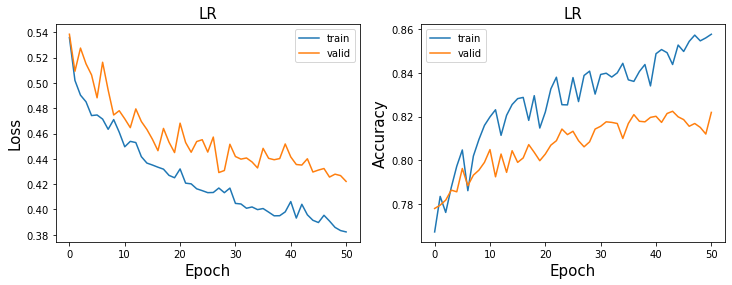

Train loss for epoch 0: 0.556174099445343
Val loss for epoch 0: 0.5253649950027466
Train loss for epoch 1: 0.5026600956916809
Val loss for epoch 1: 0.5185052156448364
1
Train loss for epoch 2: 0.4933384358882904
Val loss for epoch 2: 0.4950717091560364
2
Train loss for epoch 3: 0.49398043751716614
Val loss for epoch 3: 0.5046253204345703
Train loss for epoch 4: 0.48480096459388733
Val loss for epoch 4: 0.5013415217399597
Train loss for epoch 5: 0.47419241070747375
Val loss for epoch 5: 0.5075500011444092
Train loss for epoch 6: 0.4854115843772888
Val loss for epoch 6: 0.4910636246204376
6
Train loss for epoch 7: 0.4656136631965637
Val loss for epoch 7: 0.4980718195438385
Train loss for epoch 8: 0.4607669711112976
Val loss for epoch 8: 0.48793819546699524
8
Train loss for epoch 9: 0.4587499797344208
Val loss for epoch 9: 0.48171788454055786
9
Train loss for epoch 10: 0.4567972719669342
Val loss for epoch 10: 0.4843280613422394
Train loss for epoch 11: 0.4511934816837311
Val loss for epo

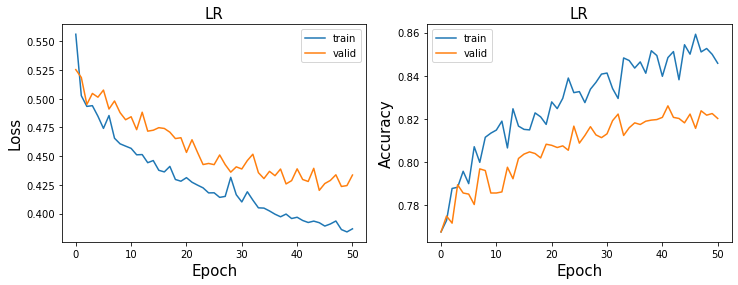

Train loss for epoch 0: 0.5307412147521973
Val loss for epoch 0: 0.5343713760375977
Train loss for epoch 1: 0.5027226805686951
Val loss for epoch 1: 0.5059000253677368
1
Train loss for epoch 2: 0.48992252349853516
Val loss for epoch 2: 0.5062026977539062
Train loss for epoch 3: 0.4832817614078522
Val loss for epoch 3: 0.5214620232582092
Train loss for epoch 4: 0.48612672090530396
Val loss for epoch 4: 0.4954368472099304
4
Train loss for epoch 5: 0.4716269373893738
Val loss for epoch 5: 0.48138970136642456
5
Train loss for epoch 6: 0.4690568149089813
Val loss for epoch 6: 0.48922571539878845
Train loss for epoch 7: 0.4698346257209778
Val loss for epoch 7: 0.49150627851486206
Train loss for epoch 8: 0.47216805815696716
Val loss for epoch 8: 0.48696646094322205
Train loss for epoch 9: 0.454530268907547
Val loss for epoch 9: 0.4686582088470459
9
Train loss for epoch 10: 0.451776921749115
Val loss for epoch 10: 0.47701188921928406
Train loss for epoch 11: 0.4508579969406128
Val loss for epo

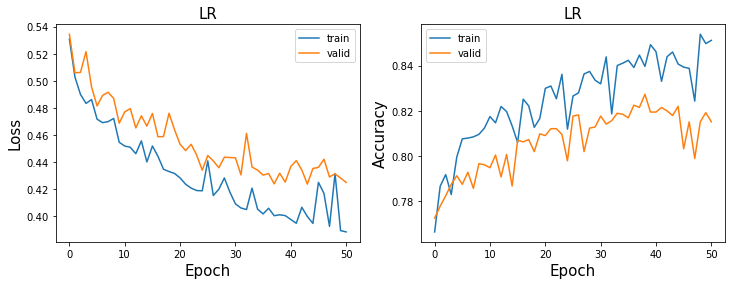

In [30]:
for alpha in alphas: 
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [31]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


       epoch
alpha       
1         50
50        44
100       43


/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGnone1_EPOCH50_REDUCEsum.pt


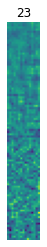

validation loss:0.42214760184288025 accuracy:0.8219282625286187
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


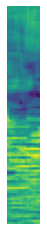

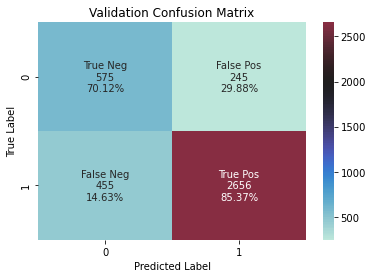

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGnone50_EPOCH44_REDUCEsum.pt


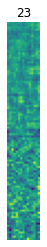

validation loss:0.4202393591403961 accuracy:0.8181124395828033
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


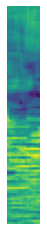

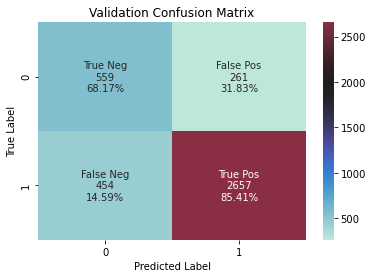

/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_15s_2/LR_models/LR_CH23_LOSSbce_REGnone100_EPOCH43_REDUCEsum.pt


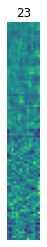

validation loss:0.4236627221107483 accuracy:0.8178580513864157
0.7914017
date:180327, rec:006, time:117.0, label:1.0
Original data 62 CH


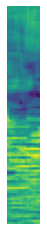

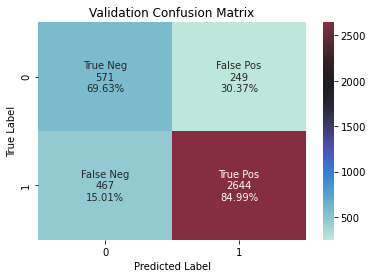

In [32]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic regression with L2 regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alphas = [1,50,100]
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'
CH = 23
timewindow = 15

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

Train loss for epoch 0: 0.5407002568244934
Val loss for epoch 0: 0.5122044682502747
Train loss for epoch 1: 0.5044822692871094
Val loss for epoch 1: 0.5113841891288757
1
Train loss for epoch 2: 0.4949648082256317
Val loss for epoch 2: 0.5267331600189209
Train loss for epoch 3: 0.4916210472583771
Val loss for epoch 3: 0.5244065523147583
Train loss for epoch 4: 0.48813480138778687
Val loss for epoch 4: 0.5141876339912415
Train loss for epoch 5: 0.4797765612602234
Val loss for epoch 5: 0.5011979937553406
5
Train loss for epoch 6: 0.4738334119319916
Val loss for epoch 6: 0.5065295100212097
Train loss for epoch 7: 0.46903520822525024
Val loss for epoch 7: 0.4989220201969147
7
Train loss for epoch 8: 0.46214544773101807
Val loss for epoch 8: 0.4804927706718445
8
Train loss for epoch 9: 0.45964112877845764
Val loss for epoch 9: 0.49220889806747437
Train loss for epoch 10: 0.4592863917350769
Val loss for epoch 10: 0.4896731972694397
Train loss for epoch 11: 0.4573138654232025
Val loss for epoc

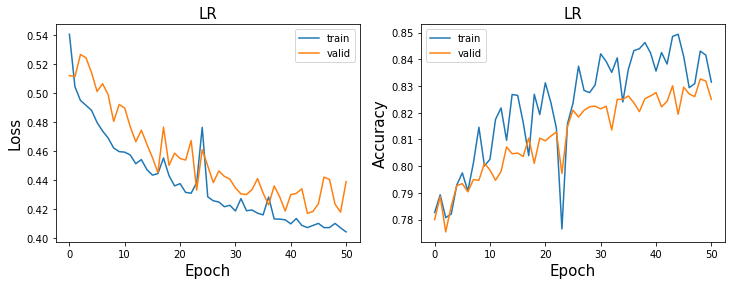

Train loss for epoch 0: 0.6406088471412659
Val loss for epoch 0: 0.591620147228241
Train loss for epoch 1: 0.5670275092124939
Val loss for epoch 1: 0.5549530386924744
1
Train loss for epoch 2: 0.568371593952179
Val loss for epoch 2: 0.5541643500328064
2
Train loss for epoch 3: 0.5785016417503357
Val loss for epoch 3: 0.5421937704086304
3
Train loss for epoch 4: 0.5839976072311401
Val loss for epoch 4: 0.5389301776885986
4
Train loss for epoch 5: 0.592577338218689
Val loss for epoch 5: 0.540187418460846
Train loss for epoch 6: 0.5700114369392395
Val loss for epoch 6: 0.532738447189331
6
Train loss for epoch 7: 0.5668522715568542
Val loss for epoch 7: 0.5188286900520325
7
Train loss for epoch 8: 0.5703155398368835
Val loss for epoch 8: 0.5143566131591797
8
Train loss for epoch 9: 0.5699077844619751
Val loss for epoch 9: 0.5140846967697144
9
Train loss for epoch 10: 0.5774727463722229
Val loss for epoch 10: 0.5090250968933105
10
Train loss for epoch 11: 0.5643657445907593
Val loss for epo

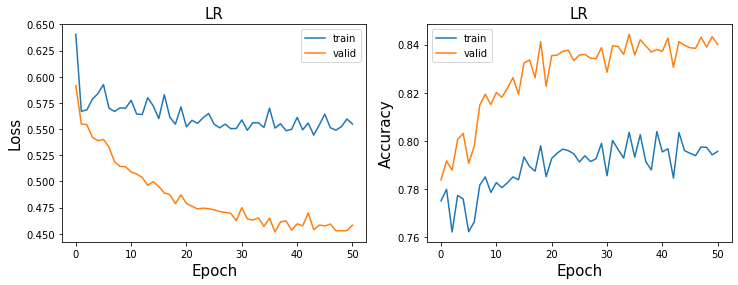

Train loss for epoch 0: 0.6860149502754211
Val loss for epoch 0: 0.5917155146598816
Train loss for epoch 1: 0.6152747273445129
Val loss for epoch 1: 0.5864797234535217
1
Train loss for epoch 2: 0.6324066519737244
Val loss for epoch 2: 0.5901642441749573
Train loss for epoch 3: 0.633458137512207
Val loss for epoch 3: 0.577407717704773
3
Train loss for epoch 4: 0.6295655369758606
Val loss for epoch 4: 0.5700110793113708
4
Train loss for epoch 5: 0.6308485865592957
Val loss for epoch 5: 0.5680074691772461
5
Train loss for epoch 6: 0.6274119019508362
Val loss for epoch 6: 0.5590517520904541
6
Train loss for epoch 7: 0.6319401264190674
Val loss for epoch 7: 0.5513091683387756
7
Train loss for epoch 8: 0.6316365599632263
Val loss for epoch 8: 0.5503914952278137
8
Train loss for epoch 9: 0.6171325445175171
Val loss for epoch 9: 0.5412924885749817
9
Train loss for epoch 10: 0.6252376437187195
Val loss for epoch 10: 0.5404016971588135
10
Train loss for epoch 11: 0.6157426238059998
Val loss for 

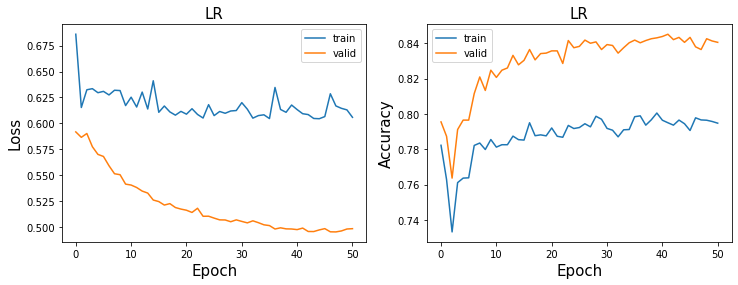

In [38]:
for alpha in alphas: 
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,timewindow = timewindow)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,timewindow = timewindow)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [ ]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


In [ ]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### Logistic Regression with finite difference regularization

In [39]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'
CH = 23

model = GLM(100*timewindow).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

Train loss for epoch 0: 0.541142463684082
Val loss for epoch 0: 0.5425853729248047
Train loss for epoch 1: 0.510379433631897
Val loss for epoch 1: 0.5137587189674377
1
Train loss for epoch 2: 0.49840301275253296
Val loss for epoch 2: 0.5149819254875183
Train loss for epoch 3: 0.49499139189720154
Val loss for epoch 3: 0.5052260756492615
3
Train loss for epoch 4: 0.4864136874675751
Val loss for epoch 4: 0.511614978313446
Train loss for epoch 5: 0.48136740922927856
Val loss for epoch 5: 0.49137499928474426
5
Train loss for epoch 6: 0.4790295958518982
Val loss for epoch 6: 0.5119682550430298
Train loss for epoch 7: 0.48443490266799927
Val loss for epoch 7: 0.4817329943180084
7
Train loss for epoch 8: 0.4686563014984131
Val loss for epoch 8: 0.4884268343448639
Train loss for epoch 9: 0.4751659631729126
Val loss for epoch 9: 0.47821080684661865
9
Train loss for epoch 10: 0.4654010534286499
Val loss for epoch 10: 0.490511953830719
Train loss for epoch 11: 0.48867693543434143
Val loss for epoc

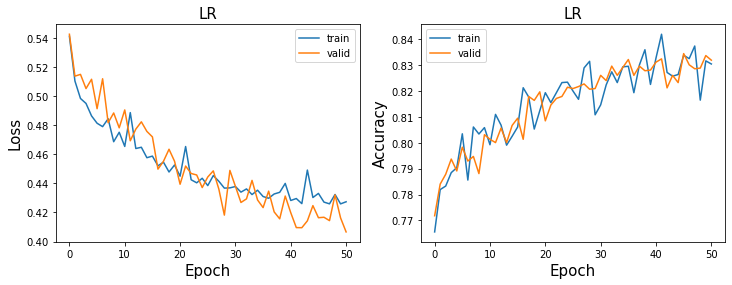

Train loss for epoch 0: 0.685249388217926
Val loss for epoch 0: 0.5317022800445557
Train loss for epoch 1: 0.5713798403739929
Val loss for epoch 1: 0.5288262963294983
1
Train loss for epoch 2: 0.5796689987182617
Val loss for epoch 2: 0.544511616230011
Train loss for epoch 3: 0.5693705081939697
Val loss for epoch 3: 0.5347852110862732
Train loss for epoch 4: 0.5713714361190796
Val loss for epoch 4: 0.5374826788902283
Train loss for epoch 5: 0.5625373125076294
Val loss for epoch 5: 0.5227290987968445
5
Train loss for epoch 6: 0.5638550519943237
Val loss for epoch 6: 0.5260043740272522
Train loss for epoch 7: 0.5603987574577332
Val loss for epoch 7: 0.5220309495925903
7
Train loss for epoch 8: 0.56071537733078
Val loss for epoch 8: 0.5147537589073181
8
Train loss for epoch 9: 0.5586913228034973
Val loss for epoch 9: 0.5166596174240112
Train loss for epoch 10: 0.5567032098770142
Val loss for epoch 10: 0.5095624923706055
10
Train loss for epoch 11: 0.555462121963501
Val loss for epoch 11: 0

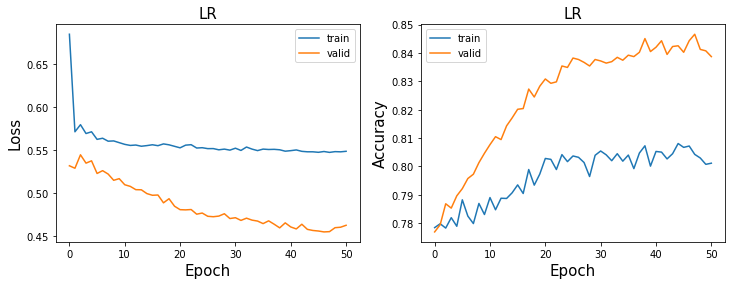

Train loss for epoch 0: 0.7794866561889648
Val loss for epoch 0: 0.5481253862380981
Train loss for epoch 1: 0.6361750364303589
Val loss for epoch 1: 0.5622103810310364
Train loss for epoch 2: 0.6460130214691162
Val loss for epoch 2: 0.5875861644744873
Train loss for epoch 3: 0.6272554397583008
Val loss for epoch 3: 0.5673797726631165
Train loss for epoch 4: 0.6317929029464722
Val loss for epoch 4: 0.5753136873245239
Train loss for epoch 5: 0.6205301880836487
Val loss for epoch 5: 0.5591344237327576
Train loss for epoch 6: 0.6240852475166321
Val loss for epoch 6: 0.5592870712280273
Train loss for epoch 7: 0.6222828030586243
Val loss for epoch 7: 0.5589396953582764
Train loss for epoch 8: 0.6299526691436768
Val loss for epoch 8: 0.5573906302452087
Train loss for epoch 9: 0.6210869550704956
Val loss for epoch 9: 0.5561711192131042
Train loss for epoch 10: 0.622972309589386
Val loss for epoch 10: 0.5526843667030334
Train loss for epoch 11: 0.6227979063987732
Val loss for epoch 11: 0.555757

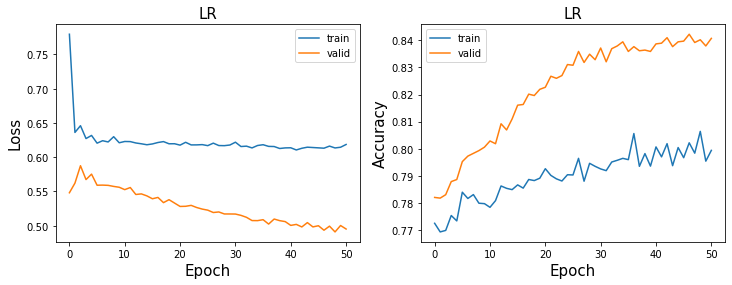

In [40]:
for alpha in alphas: 
    model = GLM(input_dim=100*timewindow).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

    for epoch in range(num_epochs):
        train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,timewindow = timewindow)
        print('Train loss for epoch {}: {}'.format(epoch, train_loss))
        val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device,timewindow = timewindow)
        print('Val loss for epoch {}: {}'.format(epoch, val_loss))
        if val_losses:
            if val_loss < min(val_losses):
                best_epoch = epoch
                print(epoch)
                path = model_saving_path
                torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
        epochs.append(epoch)
        training_losses.append(train_loss)
        training_acc.append(train_acc)
        val_losses.append(val_loss)
        validation_acc.append(val_acc)

        if train_loss < tol:
            break
    plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [ ]:
model_LR = os.listdir(model_saving_path)
results = []
for alpha in alphas:
    epoch_results = []
    reg_alpha = 'REG'+reg_type+str(alpha)+'_'
    for i, s in enumerate(model_LR):
        if '_CH23_' in s and reg_alpha in s:
            model_name = model_LR[i].split('_')
            epoch_name = [ind for ind,item in enumerate(np.array(model_name)) if "EPOCH" in item]
            res = [int(i) for i in model_name[epoch_name[0]] if i.isdigit()]
            if len(res) > 1:
                epoch_result = res[0]*10+res[1]
            else:
                epoch_result = res[0]
            epoch_results.append(epoch_result)
            
    results.append([alpha, max(epoch_results)])
    
results = pd.DataFrame(np.array(results), columns=['alpha', 'epoch'])
best_results = results.groupby('alpha').max('epoch')
print(best_results)


In [ ]:
for i,(index,row) in enumerate(best_results.iterrows()):
    
    path = model_saving_path
    best_epoch = int(row)
    alpha = index
    
    
    # load best model
    model = GLM(input_dim=100*timewindow).to(device)
    path = model_saving_path
    optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
    model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
    
    print('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch))

    ## Show one feature
    weights = model.linear.weight.view(100, timewindow)
    weights_sub = weights.detach().cpu()
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(CH))
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Calculate accuracy and validation loss
    val_loss, val_acc, val_preds, val_preds_probs, val_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
    print('validation loss:{} accuracy:{}'.format(val_loss, val_acc))
    print(np.mean(np.concatenate(val_labels)))
    
    
    ## Wrong Classifications
    path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
    pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))
    idx = 0
    print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
    print('Original data 62 CH')
    weights_sub = cases_wrong_1[0][-1][0]
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
    plt.show()
    
    ## Confusion matrix
    predictions_val = np.concatenate(val_preds)
    labels_val = np.concatenate(val_labels)

    df_val = pd.DataFrame({'predictions': predictions_val, 'labels': labels_val})

    cm_val = confusion_matrix(labels_val, predictions_val)
    ax = plt.axes()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cm_val.flatten()]

    TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
    FPR = 1 - TNR
    TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
    FNR = 1-TPR
    group_percentages =[TNR, FPR, FNR, TPR]

    group_percentages = ["{0:.2%}".format(value) for value in
                         group_percentages]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sn.heatmap(cm_val, annot=labels, fmt='', center = 2000)
    ax.set_title('Validation Confusion Matrix')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    plt.show()

### SVM without regularization

In [22]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [13]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.6105479598045349
Val loss for epoch 0: 1.2834664583206177
Train loss for epoch 1: 0.5602447986602783
Val loss for epoch 1: 0.9178999662399292
1
Train loss for epoch 2: 0.4674215018749237
Val loss for epoch 2: 3.1678149700164795
Train loss for epoch 3: 0.5240594744682312
Val loss for epoch 3: 0.9516066312789917
Train loss for epoch 4: 0.4172993004322052
Val loss for epoch 4: 1.5819454193115234
Train loss for epoch 5: 0.4704030156135559
Val loss for epoch 5: 1.1257431507110596
Train loss for epoch 6: 0.3469279408454895
Val loss for epoch 6: 1.4243940114974976
Train loss for epoch 7: 0.3866455554962158
Val loss for epoch 7: 1.1779205799102783
Train loss for epoch 8: 0.33019065856933594
Val loss for epoch 8: 1.365188479423523
Train loss for epoch 9: 0.3815663754940033
Val loss for epoch 9: 1.5121104717254639
Train loss for epoch 10: 0.40764206647872925
Val loss for epoch 10: 1.7473173141479492
Train loss for epoch 11: 0.3409585654735565
Val loss for epoch 11: 1.27

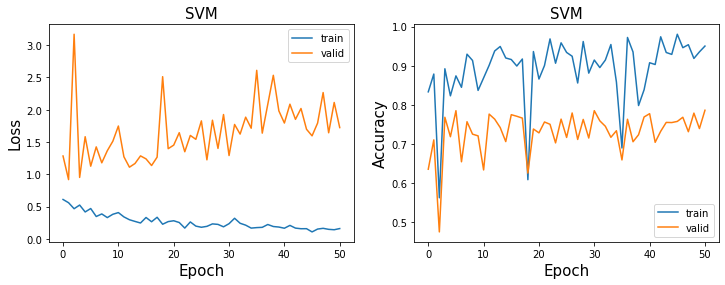

In [14]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [23]:
best_epoch = 1

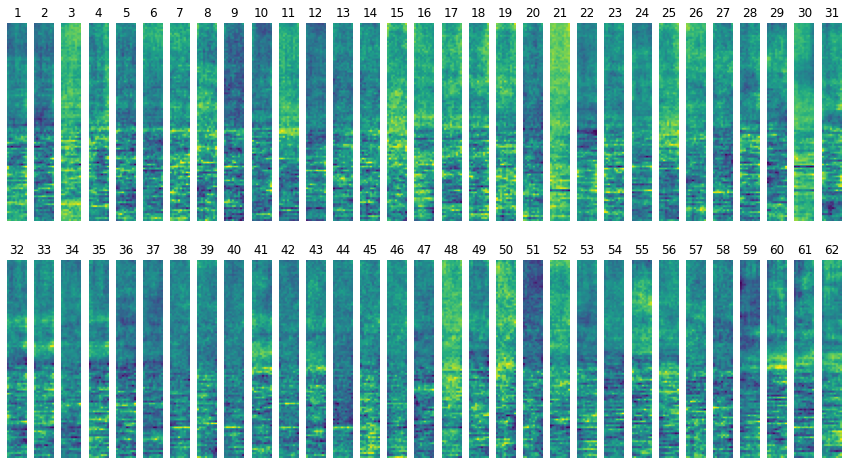

In [24]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [27]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7428555488586426 accuracy:0.7838461538461539


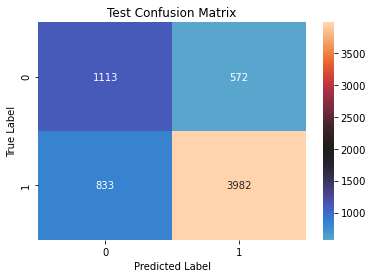

In [28]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


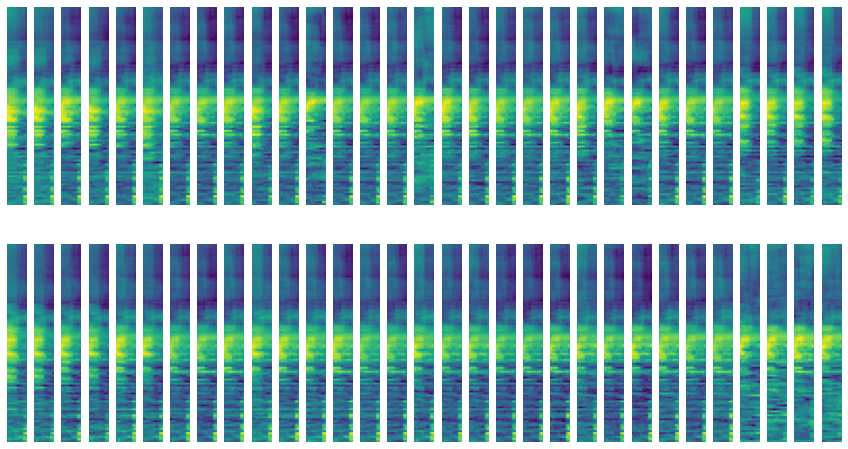

In [30]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_3[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

In [31]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5 # have special meaning as margin, corresponding to 1 in the hinge loss
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'l2'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [16]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.142331600189209
Val loss for epoch 0: 2.375016927719116
Train loss for epoch 1: 0.8872479200363159
Val loss for epoch 1: 0.9689788222312927
1
Train loss for epoch 2: 0.9464882612228394
Val loss for epoch 2: 1.0704563856124878
Train loss for epoch 3: 0.8319297432899475
Val loss for epoch 3: 1.3819953203201294
Train loss for epoch 4: 0.9815953969955444
Val loss for epoch 4: 2.2135136127471924
Train loss for epoch 5: 0.9559652209281921
Val loss for epoch 5: 1.3571209907531738
Train loss for epoch 6: 0.9480046629905701
Val loss for epoch 6: 0.958657443523407
6
Train loss for epoch 7: 0.8747104406356812
Val loss for epoch 7: 1.0527974367141724
Train loss for epoch 8: 0.938942551612854
Val loss for epoch 8: 1.816292405128479
Train loss for epoch 9: 1.033324956893921
Val loss for epoch 9: 1.2031350135803223
Train loss for epoch 10: 0.908989667892456
Val loss for epoch 10: 0.6989802718162537
10
Train loss for epoch 11: 0.9314482808113098
Val loss for epoch 11: 1.08010

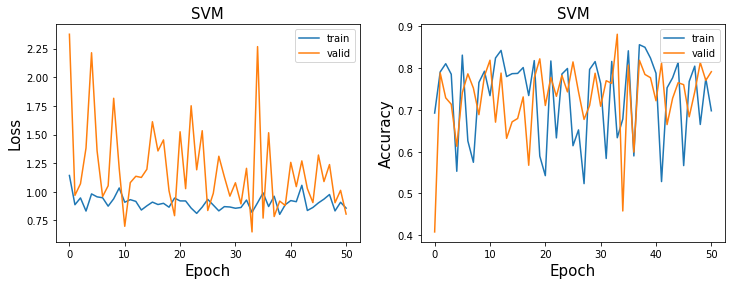

In [17]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [32]:
best_epoch = 33

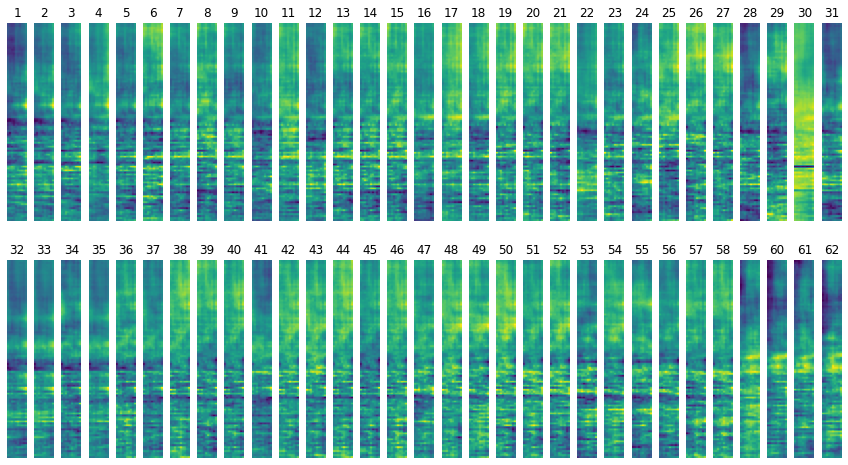

In [33]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_4 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:1.2684636116027832 accuracy:0.7512307692307693


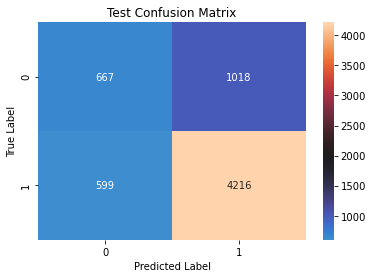

In [35]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


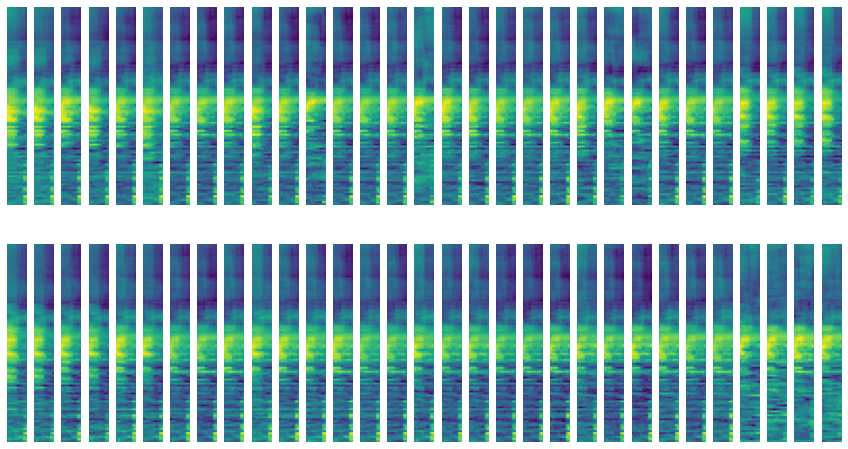

In [36]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_4[0][0], cases_wrong_4[0][1], cases_wrong_4[0][1], cases_wrong_4[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_4[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

### SVM with finite difference regularization

In [37]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.5
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'finite_diff'
CH = 'all'

model = GLM().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [19]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 1.1333791017532349
Val loss for epoch 0: 1.699452519416809
Train loss for epoch 1: 0.7799455523490906
Val loss for epoch 1: 1.1568527221679688
1
Train loss for epoch 2: 0.8088831305503845
Val loss for epoch 2: 1.5023279190063477
Train loss for epoch 3: 0.7681555151939392
Val loss for epoch 3: 1.125550389289856
3
Train loss for epoch 4: 0.779151201248169
Val loss for epoch 4: 0.9314382076263428
4
Train loss for epoch 5: 0.6864786744117737
Val loss for epoch 5: 1.0832509994506836
Train loss for epoch 6: 0.6971858739852905
Val loss for epoch 6: 1.0215011835098267
Train loss for epoch 7: 0.7639809250831604
Val loss for epoch 7: 1.7163935899734497
Train loss for epoch 8: 0.7523619532585144
Val loss for epoch 8: 1.3559271097183228
Train loss for epoch 9: 0.837641179561615
Val loss for epoch 9: 1.0237863063812256
Train loss for epoch 10: 0.7160231471061707
Val loss for epoch 10: 1.128845453262329
Train loss for epoch 11: 0.7040753364562988
Val loss for epoch 11: 3.2867

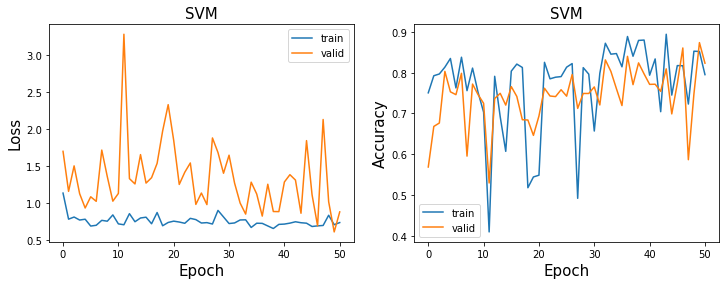

In [20]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [38]:
best_epoch = 49

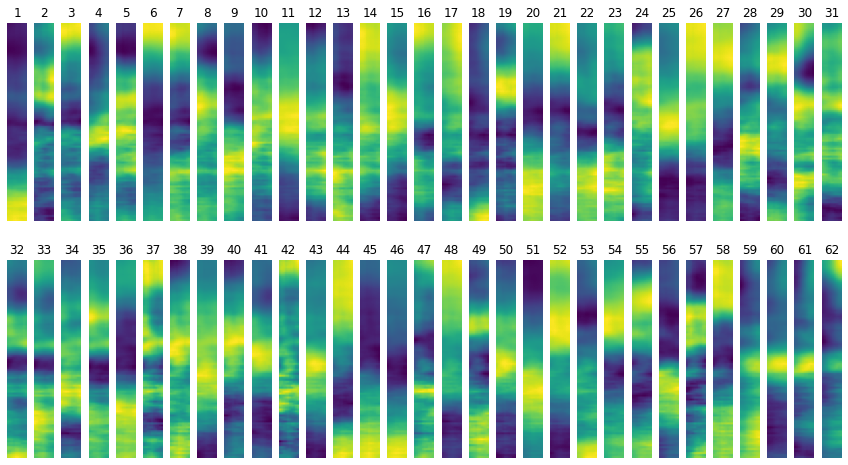

In [39]:
model = GLM().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [40]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_5 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.8956817984580994 accuracy:0.8355384615384616


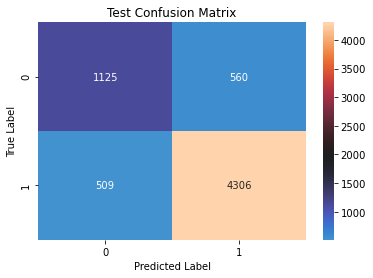

In [41]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:007, time:007, label:1.0
Original data 62 CH


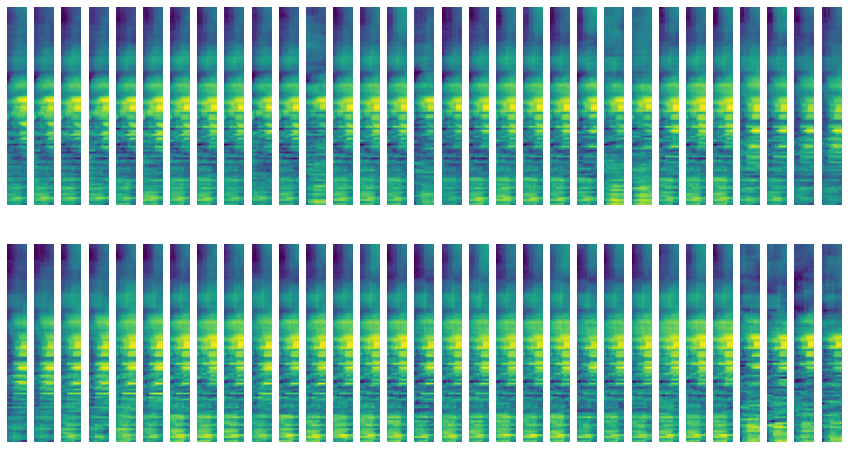

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_5[0][0], cases_wrong_5[0][1], cases_wrong_5[0][1], cases_wrong_5[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_5[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()